# 프로젝트 개요
- 강의명 : (산대특)_공공데이터 활용 빅데이터 분석 및 시각화 전문가 과정 육성
- 교과목명 : 빅데이터 기반 딥러닝
- 프로젝트 주제 : CNN 알고리즘을 활용하여 개와 고양이를 구분하는 딥러닝 코드를 작성한다. 
- 프로젝트 마감일 : 2022년 11월 04일 금요일
- 수강생명 : 홍길동

## 옵션
- 한글 서체 설치

In [12]:
#한글 서체 설치 # 생략 가능
#실행하려면 다음 코드 앞의 #를 삭제한 후 실행해주세요. 

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [15]:
#설치 후 런타임 > 런타임 다시 시작을 해줘야 합니다. 
#이 과정이 싫다면 건너 뛰어도 상관없습니다. 실행하려면 다음 코드 앞의 #을 삭제해주세요.
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## 평가 1. 구글 드라이브 연동 및 파일 확인 (10점)
- 구글 드라이브에 data 폴더와 연동하여 실제 데이터가 존재하는지 출력한다. 
  + 처음 4개만 출력한다. 

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

DATA_PATH = "/content/drive/MyDrive/Colab Notebooks/산대특/7차시 빅데이터 기반 딥러닝 평가/catanddog/"

# 코드
%cd /content/drive/MyDrive/Colab Notebooks/산대특/7차시 빅데이터 기반 딥러닝 평가/catanddog
!ls

/content/drive/MyDrive/Colab Notebooks/산대특/7차시 빅데이터 기반 딥러닝 평가/catanddog
train  validation


### 훈련 및 검증 자료를 임의대로 선정하여 4장을 출력함

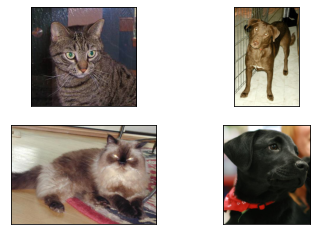

In [3]:
img1 = mpimg.imread(DATA_PATH+"train/Cat/1.jpg")
img2 = mpimg.imread(DATA_PATH+"train/Dog/1.jpg")
img3 = mpimg.imread(DATA_PATH+"validation/Cat/8101.jpg")
img4 = mpimg.imread(DATA_PATH+"validation/Dog/8101.jpg")
imgs = [img1, img2, img3, img4]

for i in range(4) :
  plt.subplot(2,2,i+1)
  plt.imshow(imgs[i])
  plt.xticks([])
  plt.yticks([])

## 평가 2. 이미지 데이터 시각화 (20점)
- 주어진 이미지 데이터를 2 x 2 배열로 시각화 코드를 작성한다. 
  + 작성 시, 20점
  + 미 작성 시, 0점
  

### 이미지 전처리 전, 2 X 2 배열로 시각화 코드 작성

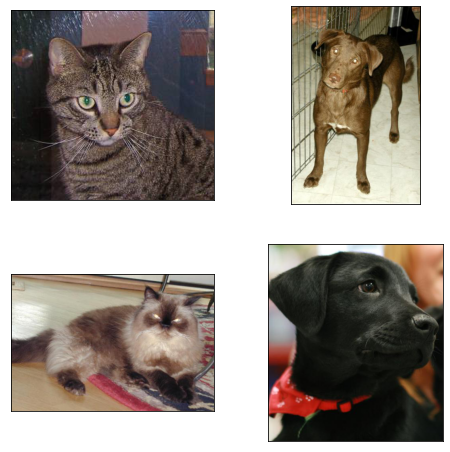

In [39]:
plt.figure(figsize=(8,8))
for i in range(4):
  plt.subplot(2, 2, i + 1, xticks=[], yticks=[])
  plt.imshow(imgs[i])

### 이미지 전처리 후, 2 X 2 배열로 시각화 코드 작성

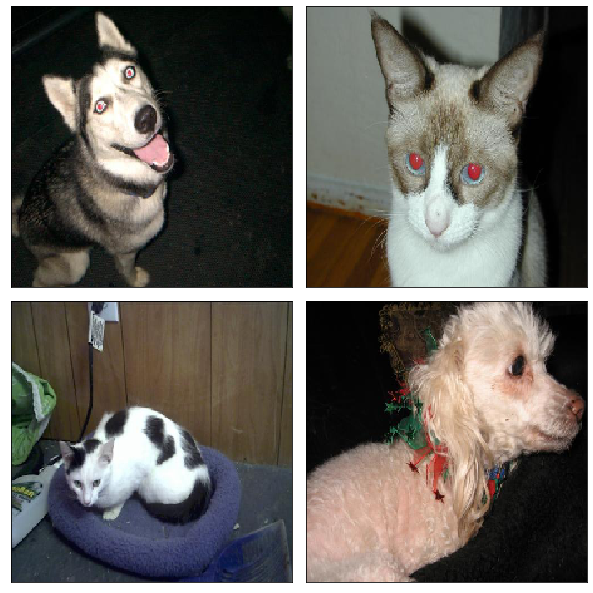

In [40]:
# 코드
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
train, label_batch  = next(iter(train_generator))

for i in range(4):
    ax = fig.add_subplot(2, 2, i + 1, xticks=[], yticks=[])
    ax.imshow(train[i,:],cmap=plt.cm.gray_r, interpolation='nearest')

## 평가 3. 사전 훈련된 모델 내려받기 (10점)
- ResNet50 모형을 내려받는다. 
  + 조건 1: 네트워크 상단에 완전연결층은 포함
  + 조건 2: 가중치는 imagnet을 사용한다. 
  + 조건 3: classes 값은 1000으로 지정한다. 
  + 다른 조건은 None으로 처리한다. 
- 변수명은 model로 정의한다. 
- 평가
  + 조건 모두 만족 시, 10점
  + 조건 2개 만족 시, 7점
  + 조건 1개 만족 시, 0점

### ResNet50 모형을 조건을 맞추어 내려받고, model로 변수 정의함

In [5]:
# 코드
from tensorflow.keras.applications import ResNet50
model = ResNet50(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

- 아래 Total Params와 갯수가 동일해야 한다. 

In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

## 평가 4. 네트워크에 밀집층 추가 (10점)
- 앞서 생성된 모델에 이어 밀집층을 추가한다. 
  + 조건 1. 활성화함수는 'sigmoid'를 이용한다. 
  + 조건 2. 출력 갯수는 2를 설정한다. 
- 평가
  + 조건 모두 만족 시 10점
  + 그 외 0점
- 모델 summary() 결과가 동일해야 함
- 변수명은 model로 정의한다. 

### 밀집층 추가함

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model.trainable=False
model = Sequential([
    model, Dense(2,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense (Dense)               (None, 2)                 2002      
                                                                 
Total params: 25,638,714
Trainable params: 2,002
Non-trainable params: 25,636,712
_________________________________________________________________


## 평가 5. 훈련에 사용될 환경 설정 (10점)
- 모델 컴파일을 위한 코드를 작성한다. 
  + 조건 1. 손실함수는 이진 분류를 위한 함수
  + 조건 2. 옵티마이저는 아담이다. 
  + 조건 3. 평가지표는 정확도이다. 
- 평가
  + 조건 모두 만족 시 10점
  + 그 외 0점

### 모델 컴파일 작성함

In [7]:
# 코드 
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## 평가 6. 이미지 데이터 증강 (30점)
- 이미지 데이터 학습을 돕는 ImageDataGenerator 클래스를 사용한다.  
  + 조건 1. 구글 드라이브에 있는 train 폴더 내 데이터를 활용하여 이미지를 증강한 뒤, train_generator로 저장한다. 
  + 조건 2. 구글 드라이브에 있는 validation 폴더 내 데이터를 이미지를 증강한 뒤, valid_generator로 저장한다.
- ImageDataGenerator 옵션 내 파라미터는 자유롭게 활용한다. 
  + class_mode = 'categorical'로 지정한다. 
- 평가
  + 조건 모두 만족 시 30점
  + 그 외 0점

### ImageDataGenerator 불러옴

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### 이미지 전처리

In [18]:
BATCH_SIZE = 32
train_dir = "/content/drive/MyDrive/Colab Notebooks/산대특/7차시 빅데이터 기반 딥러닝 평가/catanddog/train"
valid_dir = "/content/drive/MyDrive/Colab Notebooks/산대특/7차시 빅데이터 기반 딥러닝 평가/catanddog/validation"

# 코드
train = ImageDataGenerator(rescale=1.0/255.0)
valid = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode='categorical'
)

valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    seed=5,
    shuffle=True,
    class_mode='categorical'
)


Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


## 평가 7. 모형 학습, 모형 정확도 시각화, 예측 (10점)
- 모형 학습 코드는 아래 코드를 그대로 실행한다. 

### 모형을 history 변수로 정의하여, 모델 학습함

In [10]:
history=model.fit(train_generator,
          epochs=5,
          validation_data=valid_generator,
          verbose=2)

Epoch 1/5
13/13 - 12s - loss: 0.6932 - accuracy: 0.4675 - val_loss: 0.6932 - val_accuracy: 0.5000 - 12s/epoch - 907ms/step
Epoch 2/5
13/13 - 3s - loss: 0.6932 - accuracy: 0.4623 - val_loss: 0.6932 - val_accuracy: 0.5000 - 3s/epoch - 204ms/step
Epoch 3/5
13/13 - 3s - loss: 0.6931 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 3s/epoch - 202ms/step
Epoch 4/5
13/13 - 3s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 3s/epoch - 202ms/step
Epoch 5/5
13/13 - 3s - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6932 - val_accuracy: 0.5000 - 3s/epoch - 206ms/step


- 모델 정확도 시각화를 작성한다. 
- 평가
  + 작성 시, 10점
  + 미 작성 시, 0점

### 모델 정확도 시각화 작성

Text(0.5, 1.0, '오차')

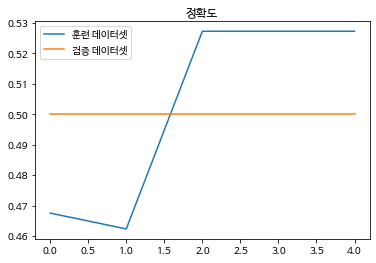

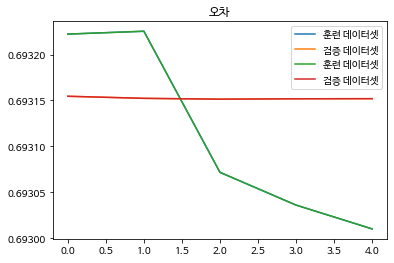

In [36]:
accuracy = history.history['accuracy']
val_accuracy=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label='훈련 데이터셋')
plt.plot(epochs, val_accuracy, label='검증 데이터셋')
plt.legend()
plt.title("정확도")
plt.figure()

plt.plot(epochs, loss, label='훈련 데이터셋')
plt.plot(epochs, val_loss, label='검증 데이터셋')
plt.plot(epochs, loss, label='훈련 데이터셋')
plt.plot(epochs, val_loss, label='검증 데이터셋')
plt.legend()
plt.title("오차")

- 훈련된 모델의 예측은 아래 코드를 실행한다. 

### 넘파이 코드를 불러옴

In [20]:
import numpy as np

### 예측 코드 실행

1/1 [==============================] - 0s 44ms/step


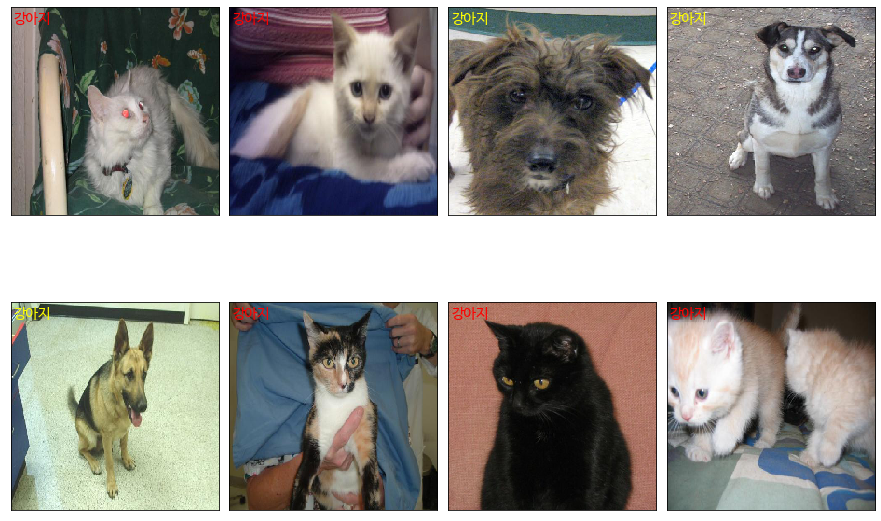

In [21]:
class_names = ['고양이', '강아지']
validation, label_batch  = next(iter(valid_generator))
prediction_values = model.predict(validation)
prediction_values = np.argmax(prediction_values, axis=1)

fig = plt.figure(figsize=(12, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(validation[i,:],cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)